# Cleaning US Census Data

#### In this project we analyze several characteristics related to American people, such as gender, income and race while cleaning the data.

In [69]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [70]:
# Loop through the census files available, load them into DataFrames and concatenate them

files = glob.glob("states*.csv")
df_list = []
for filename in files:
    data = pd.read_csv(filename)
    df_list.append(data)

us_census = pd.concat(df_list)

In [71]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [72]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [74]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [75]:
# Convert the "Income" column to numeric

us_census['Income'] = us_census['Income'].replace('[\$]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object

In [79]:
# Split the "GenderPop" column into two new columns

us_census['str_split'] = us_census['GenderPop'].str.split('_')
us_census['Men'] = us_census['str_split'].str.get(0)
us_census['Women'] = us_census['str_split'].str.get(1)
us_census.drop('str_split', axis=1, inplace=True)
us_census.drop('GenderPop', axis=1, inplace=True)

In [80]:
# Convert the gender columns to numeric

us_census['Men'] = us_census['Men'].replace('M', '', regex=True)
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = us_census['Women'].replace('F', '', regex=True)
us_census['Women'] = pd.to_numeric(us_census['Women'])

In [81]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329.0


In [92]:
# Check for nan values in the 'Women' column

us_census['Women'], us_census['Women'].info()

<class 'pandas.core.series.Series'>
Int64Index: 60 entries, 0 to 5
Series name: Women
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


(0     2489527.0
 1      349215.0
 2     3342840.0
 3     1506295.0
 4    19334329.0
 5     2630239.0
 0     2630239.0
 1     1841615.0
 2      478041.0
 3      340810.0
 4    10045763.0
 5     5123362.0
 0     5123362.0
 1      696428.0
 2      806083.0
 3     6556862.0
 4     3333382.0
 5     1558931.0
 0     1558931.0
 1     1453125.0
 2     2233145.0
 3     2364097.0
 4      679019.0
 5     3057895.0
 0     3057895.0
 1     3455936.0
 2     5038598.0
 3     2727005.0
 4     1536358.0
 5     3081445.0
 0     3081445.0
 1      504536.0
 2      939759.0
 3     1390901.0
 4      670717.0
 5     4561386.0
 0     4561386.0
 1     1051703.0
 2    10131373.0
 3     5049925.0
 4      353677.0
 5     5913084.0
 0     5913084.0
 1     1942789.0
 2     1990780.0
 3     6534215.0
 4     1869213.0
 5      543273.0
 0      543273.0
 1     2455167.0
 2      419713.0
 3     3331859.0
 4    13367298.0
 5     1444150.0
 0     1444150.0
 1      318031.0
 2     4195682.0
 3     3497739.0
 4      937789

In [93]:
# Fill the nan values for the 'Women' column

us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
us_census['Women']

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Women, dtype: float64

In [94]:
# Check for nan values in the 'Men' column

us_census['Men'], us_census['Men'].info()

<class 'pandas.core.series.Series'>
Int64Index: 60 entries, 0 to 5
Series name: Men
Non-Null Count  Dtype
--------------  -----
60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


(0     2341093
 1      384160
 2     3299088
 3     1451913
 4    19087135
 5     2648667
 0     2648667
 1     1751607
 2      448413
 3      306674
 4     9600009
 5     4883331
 0     4883331
 1      709871
 2      810464
 3     6316899
 4     3235263
 5     1534595
 0     1534595
 1     1439862
 2     2164208
 3     2261156
 4      650081
 5     2872643
 0     2872643
 1     3249650
 2     4861973
 3     2692166
 4     1451723
 5     2964003
 0     2964003
 1      510163
 2      929606
 3     1407735
 4      653484
 5     4343027
 0     4343027
 1     1032414
 2     9541801
 3     4795408
 4      367963
 5     5662893
 0     5662893
 1     1906944
 2     1948453
 3     6245344
 4     1713860
 5      510388
 0      510388
 1     2322409
 2      423477
 3     3167756
 4    13171316
 5     1459229
 0     1459229
 1      308573
 2     4060948
 3     3487725
 4      913631
 5     2851385
 Name: Men, dtype: int64,
 None)

In [90]:
# Check for duplicates

us_census.duplicated(subset = us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [91]:
# Drop the duplicates and save the result in another dataset

census = us_census.drop_duplicates(subset = us_census.columns[1:])
census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329.0
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667,2630239.0
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607,1841615.0
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413,478041.0
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674,340810.0
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009,10045763.0


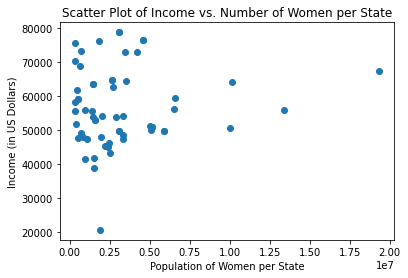

In [95]:
# Plot a scatterplot of income vs number of women per state

plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()

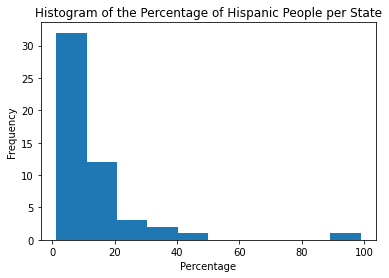

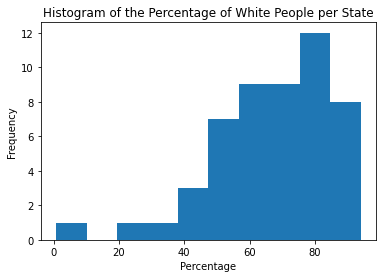

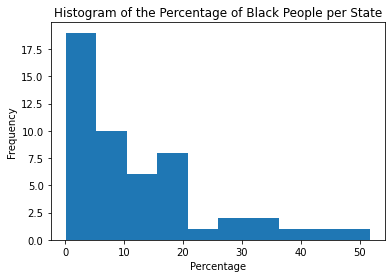

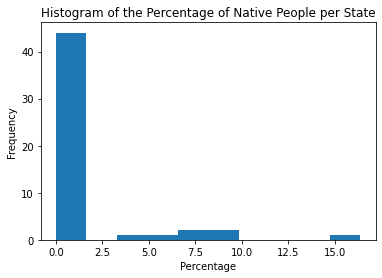

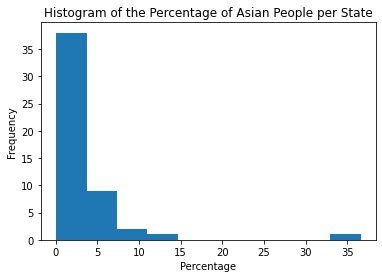

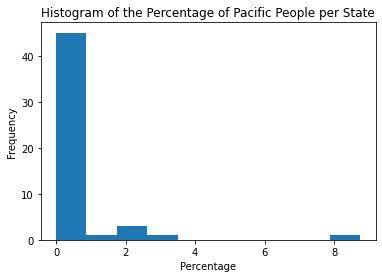

In [99]:
# Make histograms of races

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0, len(us_census)):
        string = str((us_census[race].iat[index]))
        replace = string.replace('%', '')
        if replace == 'nan':
            replace = ''
        us_census[race].iat[index] = replace
    us_census[race] = pd.to_numeric(us_census[race])
    
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

census = us_census.drop_duplicates(subset = us_census.columns[1:])

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()